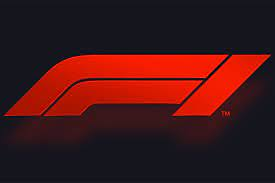

In [1]:
from IPython import display
display.Image('C:/Users/91993/Desktop/f1/f1 logo.jpeg')

# Formula 1 Data Analysis

Formula One (F1) is a form of motorsport that is widely regarded as the pinnacle of auto racing. The sport attracts the best drivers, engineers, and teams from around the world, who compete against each other in a series of races held in different countries throughout the year.

F1 is a highly competitive sport, where drivers need to possess a combination of skill, speed, and mental toughness to succeed. The sport has evolved over the years, with advances in technology and engineering leading to faster and more sophisticated cars. Today, F1 is not only about speed, but also about strategy, teamwork, and precision.

As you delve deeper into the world of F1, you will discover that the sport is full of statistics, records, and legends. One of the most debated topics in F1 is who is the greatest driver of all time. In this notebook, I will analyze the data of F1 drivers from different eras and try to identify the "Greatest of All Time" (GOAT) based on my analysis.

# Data Loading

In [3]:
import pandas as pd
import numpy as ny
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

I obtained a dataset from Kaggle that contains information on F1 drivers, teams, and races from 1950 to 2023. The dataset includes a wide range of variables, such as the driver's name, nationality, team, number of wins, pole positions, fastest laps, and championship points, as well as the race's location, date, tracks, and results.

Since my analysis focuses on the question of who is the greatest F1 driver of all time (GOAT), I decided to narrow down the dataset to the years from 1991 to 2023, which covers the careers of three of the most successful drivers in F1 history: Lewis Hamilton, Sebastian Vettel, and Michael Schumacher. These drivers have won a combined total of 16 world championships and hold numerous records and achievements in the sport.

By using this dataset, I aim to answer questions such as:

How do Hamilton, Vettel, and Schumacher compare in terms of their career statistics, such as wins, poles, fastest laps, and points?

How did their performance evolve over time, and how did they cope with changes in regulations, technology, and competition?

By analyzing this data, I hope to gain insights into what makes a great F1 driver and how these three champions compare to each other in terms of their skills, achievements, and legacies.

In [4]:
circuits=pd.read_csv('C:/Users/91993/Desktop/f1/circuits.csv')
constructor_results=pd.read_csv('C:/Users/91993/Desktop/f1/constructor_results.csv')
constructor_standings=pd.read_csv('C:/Users/91993/Desktop/f1/constructor_standings.csv')
constructors=pd.read_csv('C:/Users/91993/Desktop/f1/constructors.csv')
driver_standings=pd.read_csv('C:/Users/91993/Desktop/f1/driver_standings.csv')
drivers=pd.read_csv('C:/Users/91993/Desktop/f1/drivers.csv')
lap_times=pd.read_csv('C:/Users/91993/Desktop/f1/lap_times.csv')
pit_stops=pd.read_csv('C:/Users/91993/Desktop/f1/pit_stops.csv')
qualifying=pd.read_csv('C:/Users/91993/Desktop/f1/qualifying.csv')
races=pd.read_csv('C:/Users/91993/Desktop/f1/races.csv')
results=pd.read_csv('C:/Users/91993/Desktop/f1/results.csv')
seasons=pd.read_csv('C:/Users/91993/Desktop/f1/seasons.csv')
sprint_results=pd.read_csv('C:/Users/91993/Desktop/f1/sprint_results.csv')
status=pd.read_csv('C:/Users/91993/Desktop/f1/status.csv')

# Data Extraction, Transformation and Exploration


In [5]:
#Fetching driverId for 3 Drivers.
for i in range(len(drivers)):
    if((drivers.iloc[i]['forename']=='Lewis') & (drivers.iloc[i]['surname']=='Hamilton')):
        print(drivers.iloc[i]['driverId'])
    if((drivers.iloc[i]['forename']=='Sebastian') & (drivers.iloc[i]['surname']=='Vettel')):
        print(drivers.iloc[i]['driverId'])
    if((drivers.iloc[i]['forename']=='Michael') & (drivers.iloc[i]['surname']=='Schumacher')):
        print(drivers.iloc[i]['driverId'])  

1
20
30


In [6]:
#Filtering the data for only those 3 drivers.
final_driver_standings=driver_standings[(driver_standings['driverId']==1) | (driver_standings['driverId']==20) | (driver_standings['driverId']==30)]
final_driver_standings.head()

final_qualifying=qualifying[(qualifying['driverId']==1) | (qualifying['driverId']==20) | (qualifying['driverId']==30)]
#print(final_qualifying)

In [7]:
#Appending Id column into the dataset
temp=[]

for i in range(len(final_driver_standings)):
    temp.append(i)
final_driver_standings['id']=temp

print(final_driver_standings)

       driverStandingsId  raceId  driverId  points  position positionText  \
0                      1      18         1    10.0         1            1   
8                      9      19         1    14.0         1            1   
26                    27      20         1    14.0         3            3   
47                    48      21         1    20.0         2            2   
68                    69      22         1    28.0         3            3   
...                  ...     ...       ...     ...       ...          ...   
33840              71784    1095         1   240.0         5            5   
33858              71802    1095        20    36.0        11           11   
33862              71806    1096         1   240.0         6            6   
33880              71824    1096        20    37.0        12           12   
33886              71830    1098         1     0.0         5            5   

       wins   id  
0         1    0  
8         1    1  
26        1    2  

C:\Users\91993\AppData\Local\Temp/ipykernel_30264/1477957100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_driver_standings['id']=temp


In [8]:
final=pd.DataFrame
final = final_driver_standings[['id','raceId', 'points', 'position', 'driverId']]
final.head()

,id,raceId,points,position,driverId
0,0,18,10.0,1,1
8,1,19,14.0,1,1
26,2,20,14.0,3,1
47,3,21,20.0,2,1
68,4,22,28.0,3,1


In [9]:
#Appending the Driver Name to the DF.
temp_arr=[]
final_driver=drivers[(drivers['driverId']==1) | (drivers['driverId']==20) | (drivers['driverId']==30)]
for i in range(len(final)):
    for j in range(len(final_driver)):
        if ((final.iloc[i]['driverId'])==(final_driver.iloc[j]['driverId'])):
            temp_arr.append(final_driver.iloc[j]['forename']+" "+final_driver.iloc[j]['surname'])
final['driverName']=temp_arr
print(final)

        id  raceId  points  position  driverId        driverName
0        0      18    10.0         1         1    Lewis Hamilton
8        1      19    14.0         1         1    Lewis Hamilton
26       2      20    14.0         3         1    Lewis Hamilton
47       3      21    20.0         2         1    Lewis Hamilton
68       4      22    28.0         3         1    Lewis Hamilton
...    ...     ...     ...       ...       ...               ...
33840  918    1095   240.0         5         1    Lewis Hamilton
33858  919    1095    36.0        11        20  Sebastian Vettel
33862  920    1096   240.0         6         1    Lewis Hamilton
33880  921    1096    37.0        12        20  Sebastian Vettel
33886  922    1098     0.0         5         1    Lewis Hamilton

[923 rows x 6 columns]


C:\Users\91993\AppData\Local\Temp/ipykernel_30264/3742738485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['driverName']=temp_arr


In [10]:
#Appending year to the dataset
tempyear=[]
for i in range(len(final)):
    for j in range(len(races)):
        if ((final.iloc[i]['raceId'])==(races.iloc[j]['raceId'])):
            tempyear.append(races.iloc[j]['year'])
final['year']=tempyear
print(final)

        id  raceId  points  position  driverId        driverName  year
0        0      18    10.0         1         1    Lewis Hamilton  2008
8        1      19    14.0         1         1    Lewis Hamilton  2008
26       2      20    14.0         3         1    Lewis Hamilton  2008
47       3      21    20.0         2         1    Lewis Hamilton  2008
68       4      22    28.0         3         1    Lewis Hamilton  2008
...    ...     ...     ...       ...       ...               ...   ...
33840  918    1095   240.0         5         1    Lewis Hamilton  2022
33858  919    1095    36.0        11        20  Sebastian Vettel  2022
33862  920    1096   240.0         6         1    Lewis Hamilton  2022
33880  921    1096    37.0        12        20  Sebastian Vettel  2022
33886  922    1098     0.0         5         1    Lewis Hamilton  2023

[923 rows x 7 columns]


C:\Users\91993\AppData\Local\Temp/ipykernel_30264/3732087695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['year']=tempyear


In [11]:
final['year_of_career'] = final.groupby('driverName')['year'].apply(lambda x: x - x.min() + 1)

In [12]:
#Converting the points to the current points system for the drivers dataset.
new_points=[]
for i in range(len(final_driver_standings)):
    if ((final_driver_standings.iloc[i]['position'])==1):
        new_points.append(25)
    elif ((final_driver_standings.iloc[i]['position'])==2):
        new_points.append(18)
    elif ((final_driver_standings.iloc[i]['position'])==3):
        new_points.append(15)
    elif ((final_driver_standings.iloc[i]['position'])==4):
        new_points.append(12)
    elif ((final_driver_standings.iloc[i]['position'])==5):
        new_points.append(10)
    elif ((final_driver_standings.iloc[i]['position'])==6):
        new_points.append(8)
    elif ((final_driver_standings.iloc[i]['position'])==7):
        new_points.append(6)
    elif ((final_driver_standings.iloc[i]['position'])==8):
        new_points.append(4)
    elif ((final_driver_standings.iloc[i]['position'])==9):
        new_points.append(2)
    elif ((final_driver_standings.iloc[i]['position'])==10):
        new_points.append(1)
    else:
        new_points.append(0)

#print(new_points)
final['new_points']=new_points

In [13]:
#Repalcing '\N' values of the position to -1 since they're all the DNFs (Did Not Finish) of the drivers.
for i in range(len(results)):
    results['position'] = results['position'].replace(r'\N', -1)

print(results)

       resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
25835     25841    1096       854            210     47    12       16   
25836     25842    1096       825            210     20    16       17   
25837     25843    1096         1            131     44     5       18   
25838     25844    1096       849              3      6    20       19   
25839     25845    1096         4            214     14    10       -1   

      positionText  positionOrder  points  laps         time milliseconds  \
0                1              1 

In [14]:
results['position']=results['position'].astype(int)

In [15]:
#Converting the points to the current points system for the results dataset.
new_result_points=[]
for i in range(len(results)):
    if ((results.iloc[i]['position'])==1):
        new_result_points.append(25)
    elif ((results.iloc[i]['position'])==2):
        new_result_points.append(18)
    elif ((results.iloc[i]['position'])==3):
        new_result_points.append(15)
    elif ((results.iloc[i]['position'])==4):
        new_result_points.append(12)
    elif ((results.iloc[i]['position'])==5):
        new_result_points.append(10)
    elif ((results.iloc[i]['position'])==6):
        new_result_points.append(8)
    elif ((results.iloc[i]['position'])==7):
        new_result_points.append(6)
    elif ((results.iloc[i]['position'])==8):
        new_result_points.append(4)
    elif ((results.iloc[i]['position'])==9):
        new_result_points.append(2)
    elif ((results.iloc[i]['position'])==10):
        new_result_points.append(1)
    else:
        new_result_points.append(0)

#print(new_result_points)
results['new_points']=new_result_points

# Data Visualization
I explored various types of data visualizations, including bar charts, line charts, pie charts, multiple bar charts, and step charts. These visualizations were used to represent various statistics and metrics related to racing, including total points, wins, races, podiums, poles, dnfs, and points per season.

Bar charts were used to show the total number of each metric for different drivers, providing an easy-to-read visual representation of how each driver performed in different areas. Line charts were used to show points per season of different drivers, providing a way to see how a driver's performance changed over time.

Multiple bar charts were used to compare the performance of different drivers points and constructor points, allowing for easy comparison of performance across multiple metrics. Step charts were used to show the progression of points over years of racing, providing a way to see how a driver's points grew throughout seasons.

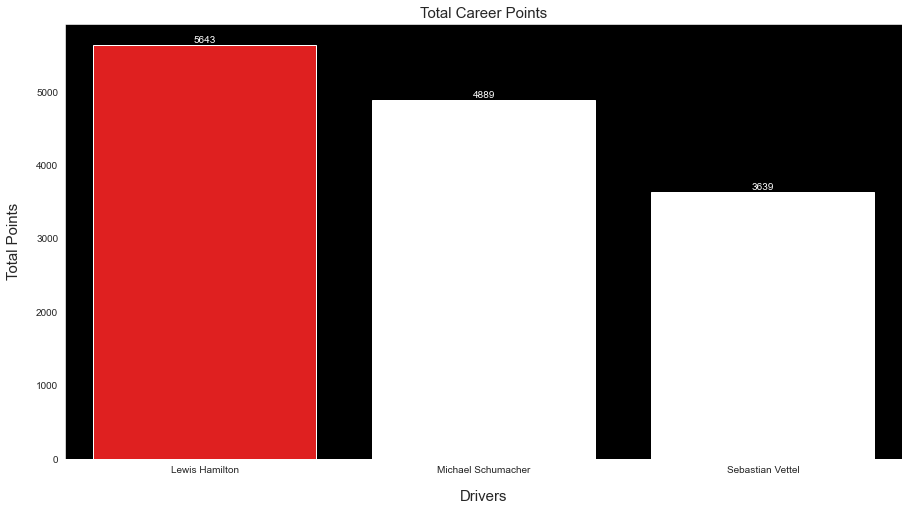

In [24]:
#Plotting bar chart to show the Total Career Points for 3 drivers.
driver_points = final.groupby('driverName')['new_points'].sum().reset_index()
driver_points = driver_points.sort_values(by='new_points', ascending=False)
sns.set_style('dark')
f, ax=plt.subplots(figsize=(15,8))
ax.set_facecolor('black')

sns.barplot(x='driverName', y='new_points', data=driver_points, palette=['red']+['white']*(len(driver_points)-1))

for i in ax.containers:
    ax.bar_label(i, label_type='edge', color='white')

plt.title('Total Career Points', fontdict={'fontsize':15})
ax.set_xlabel('Drivers', labelpad=15, fontdict={'fontsize':15})
ax.set_ylabel('Total Points', labelpad=15, fontdict={'fontsize':15})
plt.show()

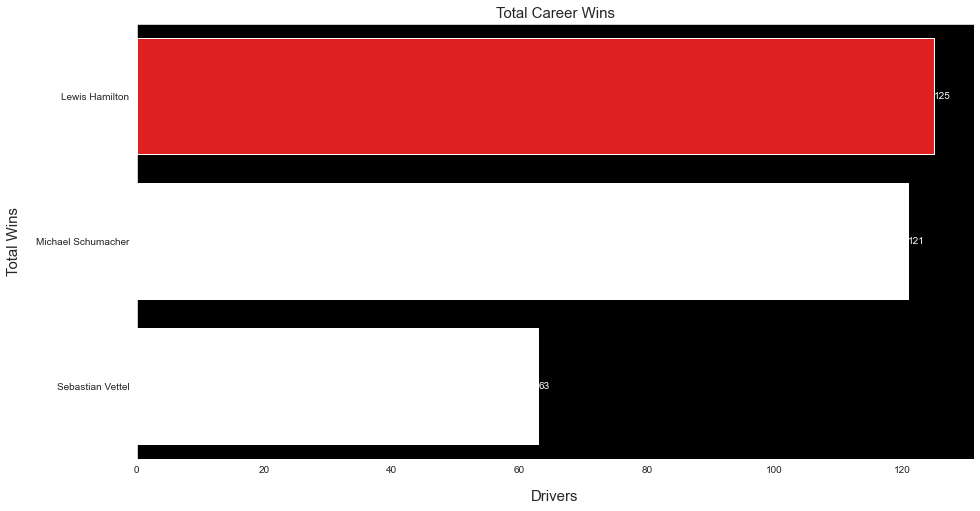

In [105]:
#Plotting bar chart to show the Total Career Wins for 3 drivers.

driver_wins = final[final['position']==1].groupby('driverName')['position'].count().reset_index()
driver_wins = driver_wins.sort_values(by='position', ascending=False)
sns.set_style('dark')
f, ax=plt.subplots(figsize=(15,8))
ax.set_facecolor('black')

sns.barplot(x='position', y='driverName', data=driver_wins, palette=['red']+['white']*(len(driver_points)-1))

for i in ax.containers:
    ax.bar_label(i, label_type='edge', color='white')

plt.title('Total Career Wins', fontdict={'fontsize':15})
ax.set_xlabel('Drivers', labelpad=15, fontdict={'fontsize':15})
ax.set_ylabel('Total Wins', labelpad=15, fontdict={'fontsize':15})
plt.show()

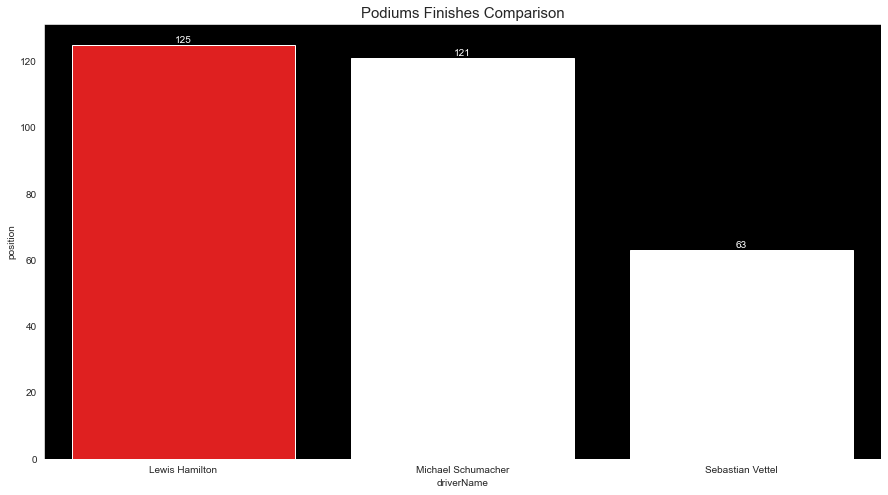

In [100]:
#Plotting bar chart to show the Total Career Podiums for 3 drivers.
driver_podiums = final[(final['position']==1) | (final['position']==2) | (final['position']==3)].groupby('driverName')['position'].count().reset_index()
driver_podiums = driver_podiums.sort_values(by='position', ascending=False)
sns.set_style('dark')
f, ax=plt.subplots(figsize=(15,8))
ax.set_facecolor('black')

sns.barplot(x='driverName', y='position', data=driver_wins, palette=['red']+['white']*(len(driver_points)-1))

for i in ax.containers:
    ax.bar_label(i, label_type='edge', color='white')

plt.title('Podiums Finishes Comparison', fontdict={'fontsize':15})
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.show()

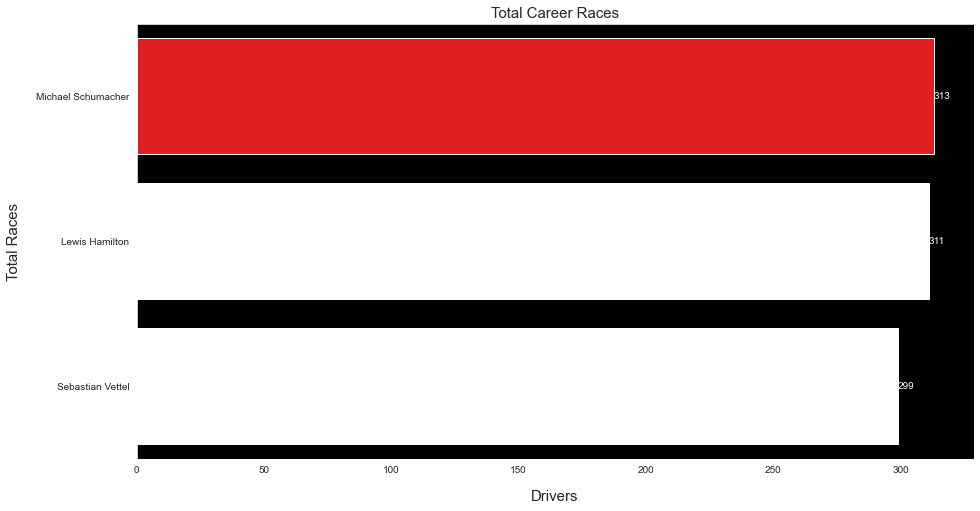

In [104]:
#Plotting bar chart to show the Total Career Races for 3 drivers.
driver_races = final.groupby('driverName')['raceId'].count().reset_index()
driver_races = driver_races.sort_values(by='raceId', ascending=False)
sns.set_style('dark')
f, ax=plt.subplots(figsize=(15,8))
ax.set_facecolor('black')

sns.barplot(x='raceId', y='driverName', data=driver_races, palette=['red']+['white']*(len(driver_points)-1))

for i in ax.containers:
    ax.bar_label(i, label_type='edge', color='white')

plt.title('Total Career Races', fontdict={'fontsize':15})
ax.set_xlabel('Drivers', labelpad=15, fontdict={'fontsize':15})
ax.set_ylabel('Total Races', labelpad=15, fontdict={'fontsize':15})
plt.show()

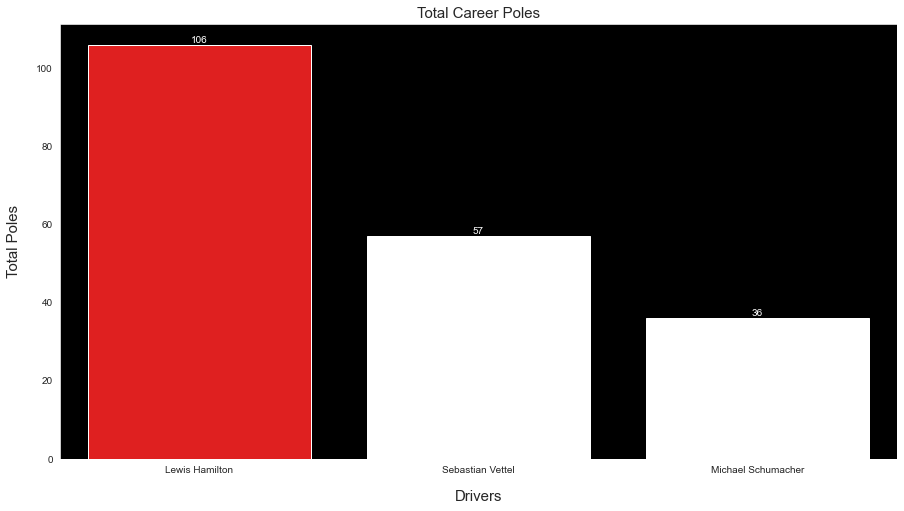

In [28]:
#Plotting bar chart to show the Total Career Poles for 3 drivers.
Drivers=['Lewis Hamilton', 'Sebastian Vettel', "Michael Schumacher"]

driver_poles = final_qualifying[(final_qualifying['position']==1)].groupby(final_qualifying['driverId'])['position'].count().reset_index()
driver_poles = driver_poles.sort_values(by='position', ascending=False)
sns.set_style('dark')
f, ax=plt.subplots(figsize=(15,8))
ax.set_facecolor('black')

sns.barplot(x=Drivers, y='position', data=driver_poles, palette=['red']+['white']*(len(driver_points)-1))

for i in ax.containers:
    ax.bar_label(i, label_type='edge', color='white')

plt.title('Total Career Poles', fontdict={'fontsize':15})
ax.set_xlabel('Drivers', labelpad=15, fontdict={'fontsize':15})
ax.set_ylabel('Total Poles', labelpad=15, fontdict={'fontsize':15})
plt.show()

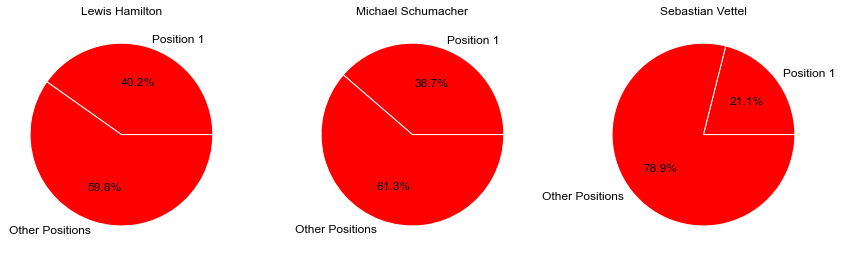

In [171]:
position_1_data = final[final['position'] == 1]

# Get top 3 drivers with most position 1 finishes
drivers_data = position_1_data['driverName'].value_counts().head(3).index.tolist()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))
red_palette = sns.color_palette(['#ff0000'])


# Iterate over drivers
for i, driver in enumerate(drivers_data):
    # Get data for driver
    driver_data = position_1_data[position_1_data['driverName'] == driver]['raceId'].count()
    other_data = final[final['driverName'] == driver]['raceId'].count() - driver_data
    
    # Plot pie chart for position=1
    ax = axes[i]
    ax.pie([driver_data, other_data], labels=['Position 1', 'Other Positions'], textprops={'color':'black', 'fontsize':'12'}, autopct='%1.1f%%', colors=red_palette)
    ax.set_title(f'{driver}', color='black')
    
# Adjust spacing and show plot
fig.tight_layout()
plt.show()

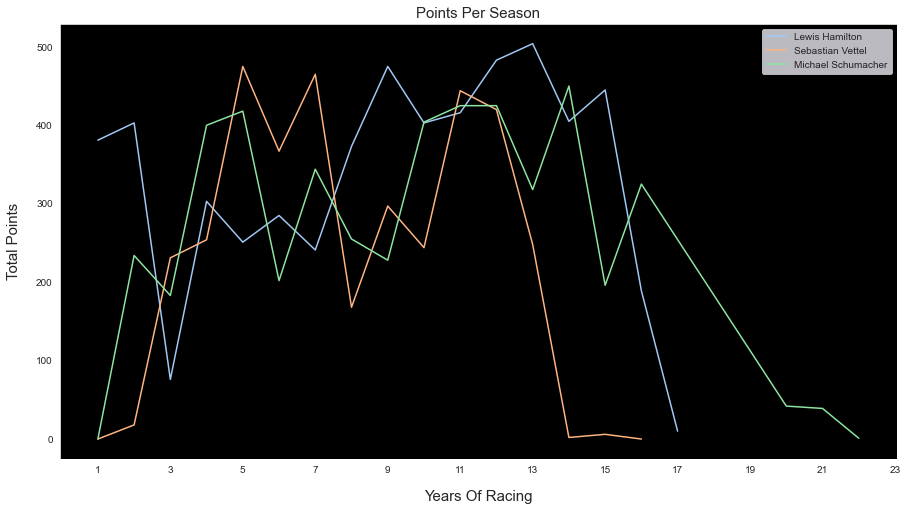

In [70]:
#Plotting line chart to show the Points Per Season for 3 drivers.
points_per_season = final.groupby(['driverId', 'driverName', 'year' ,'year_of_career'])['new_points'].sum().reset_index()
sns.set_style('dark')
f, ax=plt.subplots(figsize=(15,8))
ax.set_facecolor('black')

# Loop through the drivers and plot each line
for driver in points_per_season['driverName'].unique():
    driver_data = points_per_season[points_per_season['driverName'] == driver]
    sns.lineplot(x='year_of_career', y='new_points', data=driver_data, ax=ax, label=driver)


plt.title('Points Per Season', fontdict={'fontsize':15})
plt.xticks(range(1, 25, 2))
ax.set_xlabel('Years Of Racing', labelpad=15, fontdict={'fontsize':15})
ax.set_ylabel('Total Points', labelpad=15, fontdict={'fontsize':15})
plt.show()

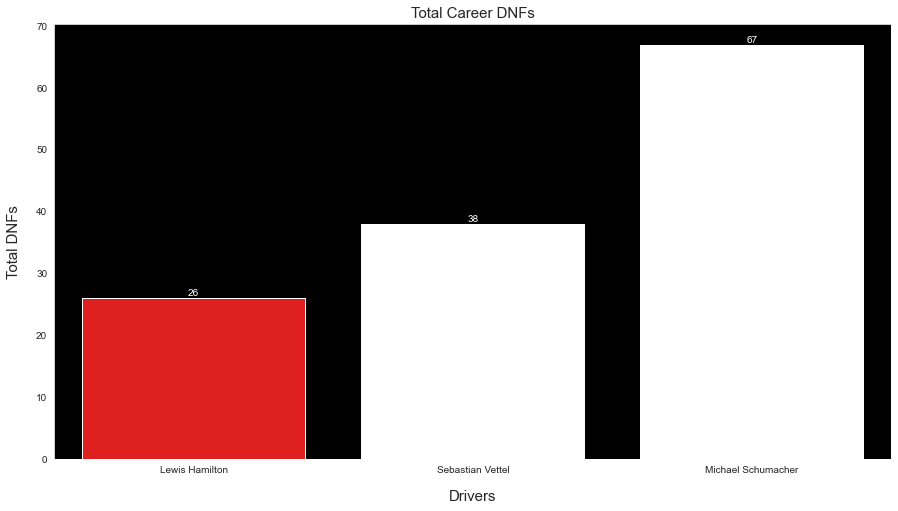

In [41]:
#Plotting bar chart to show the Total Career DNFs for 3 drivers.
driver1_data = results[results['driverId'] == 1]
driver2_data = results[results['driverId'] == 20]
driver3_data = results[results['driverId'] == 30]

sns.set_style('dark')
f, ax=plt.subplots(figsize=(15,8))
ax.set_facecolor('black')

combined_data = pd.concat([driver1_data, driver2_data, driver3_data])
Drivers = ['Lewis Hamilton', 'Sebastian Vettel', "Michael Schumacher"]
dnfs = combined_data[combined_data['position'] == -1].groupby('driverId').size().reset_index(name='DNFs')

ax=sns.barplot(x=Drivers, y='DNFs', data=dnfs, palette=['red']+['white']*(len(driver_points)-1))

for i in ax.containers:
    ax.bar_label(i, label_type='edge', color='white')

plt.title('Total Career DNFs', fontdict={'fontsize':15})
ax.set_xlabel('Drivers', labelpad=15, fontdict={'fontsize':15})
ax.set_ylabel('Total DNFs', labelpad=15, fontdict={'fontsize':15})
plt.show()

In [42]:
team_points_per_season = results.groupby(['raceId', 'driverId','constructorId'])['new_points'].sum().reset_index()
print(team_points_per_season)
merged_df = pd.merge(team_points_per_season, races, on='raceId')

# create a new column in the merged dataframe containing the year
merged_df['year'] = merged_df['year'].astype(str)

# select the relevant columns and remove duplicates
result_df = merged_df[['raceId', 'driverId',  'constructorId',  'new_points', 'year']].drop_duplicates()

team_points = result_df.groupby(['driverId','constructorId', 'year'])['new_points'].sum().reset_index()
#print(team_points)

       raceId  driverId  constructorId  new_points
0           1         1              1           0
1           1         2              2           1
2           1         3              3           8
3           1         4              4          10
4           1         5              1           0
...       ...       ...            ...         ...
25761    1096       848              3           0
25762    1096       849              3           0
25763    1096       852            213           0
25764    1096       854            210           0
25765    1096       855             51           0

[25766 rows x 4 columns]


In [43]:
team_points=team_points[(team_points['driverId']==1) | (team_points['driverId']==20) | (team_points['driverId']==30)]
#print(team_points)

In [44]:
points_per_season['year'] = points_per_season['year'].astype(str)

points = pd.merge(team_points, points_per_season, on=['driverId', 'year'])
#points.head(50)

In [65]:
points = points.rename(columns={'new_points_x': 'driver_points', 'new_points_y': 'constructor_points'})

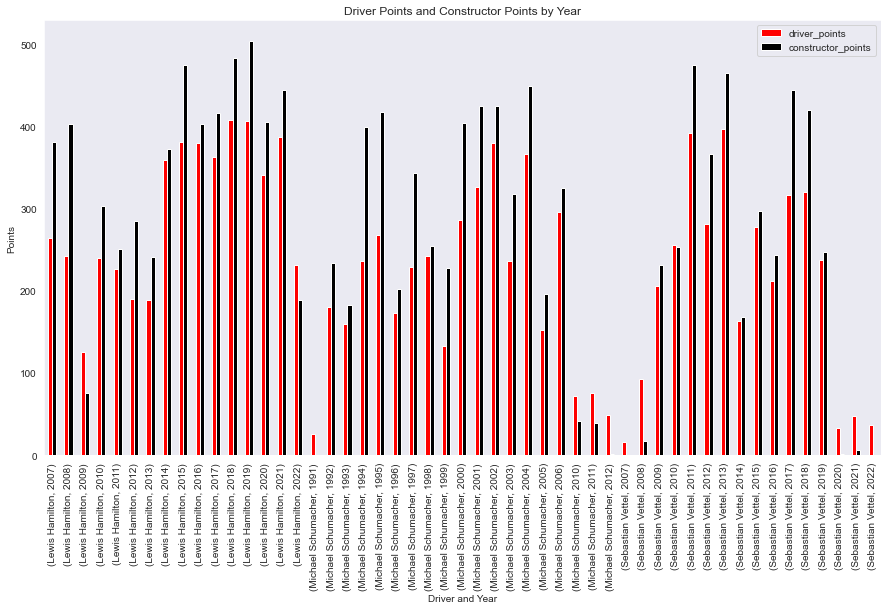

In [149]:
#Multiple column chart to show driver points versus championship points per year
grouped = points.groupby(['driverName', 'year'])[['driver_points', 'constructor_points']].sum()
custom_palette = sns.color_palette(['#ff0000', 'black'])

# create a multiple bar chart for each driver yearwise
grouped.plot(kind='bar', figsize=(15,8), color=custom_palette)

# set the chart title and axis labels
plt.title('Driver Points and Constructor Points by Year')
plt.xlabel('Driver and Year')
plt.ylabel('Points')

# show the chart
plt.show()

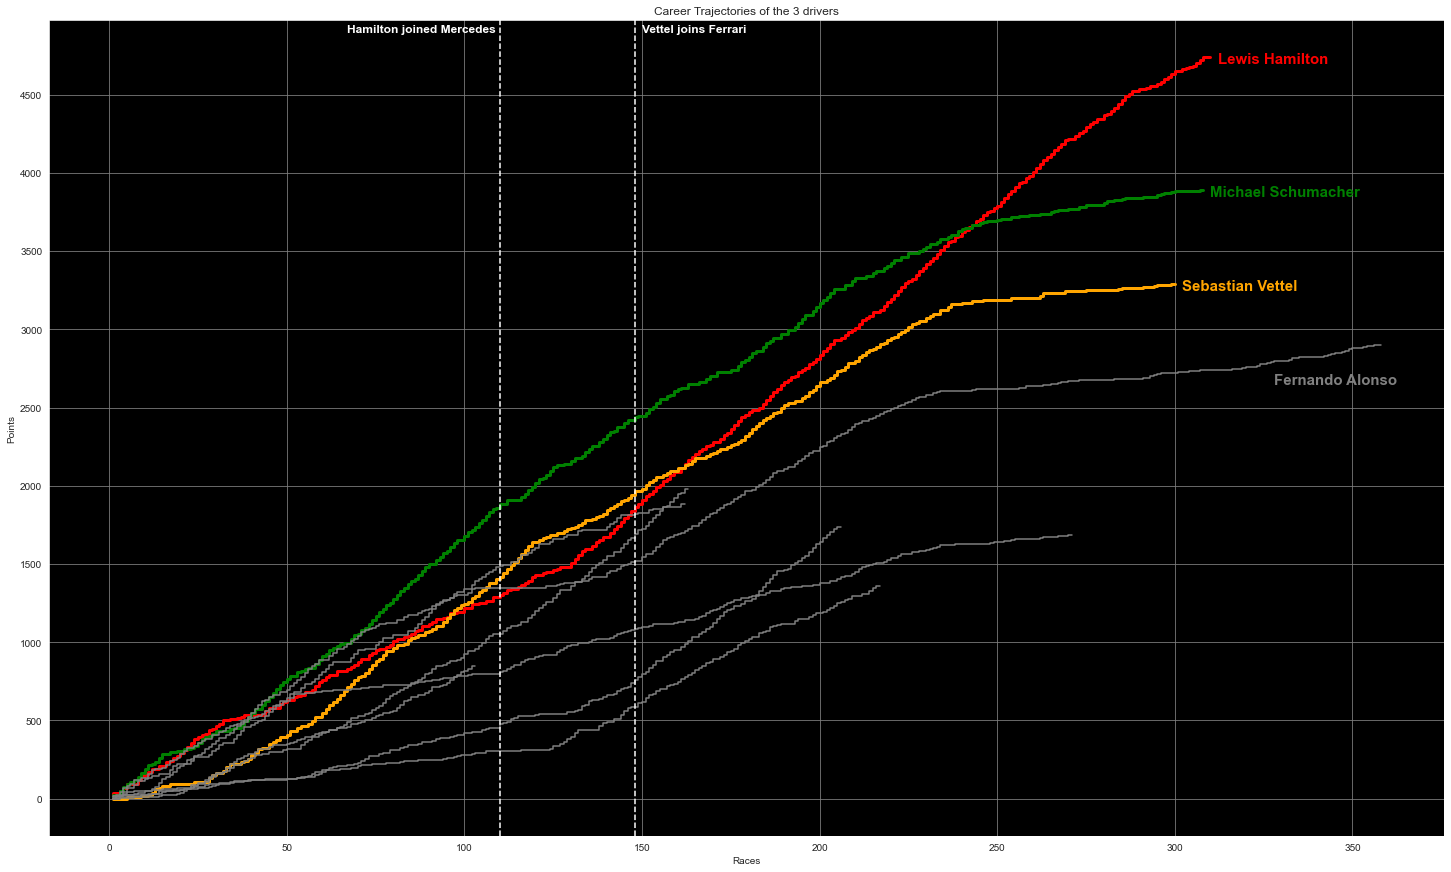

In [98]:
#Step chart showing the Drivers' career trajectory
sns.set_style('dark')
f, ax=plt.subplots(figsize=(25,15))
ax.set_facecolor('black')

# set the title and labels for the axis
ax.set_title('Career Trajectories of the 3 drivers')
ax.set_xlabel('Races')
ax.set_ylabel('Points')

driver1_races = results[(results['driverId'] == 1)]
driver2_races = results[(results['driverId'] == 20)]
driver3_races = results[(results['driverId'] == 30)]
driver4_races = results[(results['driverId'] == 3)]
driver5_races = results[(results['driverId'] == 4)]
driver6_races = results[(results['driverId'] == 13)]
driver7_races = results[(results['driverId'] == 17)]
driver8_races = results[(results['driverId'] == 102)]
driver9_races = results[(results['driverId'] == 830)]
driver10_races = results[(results['driverId'] == 844)]

raceid_to_race_number1 = {}
for i, race_id in enumerate(driver1_races['raceId'].unique()):
    raceid_to_race_number1[race_id] = i+1

raceid_to_race_number2 = {}
for i, race_id in enumerate(driver2_races['raceId'].unique()):
    raceid_to_race_number2[race_id] = i+1

raceid_to_race_number3 = {}
for i, race_id in enumerate(driver3_races['raceId'].unique()):
    raceid_to_race_number3[race_id] = i+1

raceid_to_race_number4 = {}
for i, race_id in enumerate(driver4_races['raceId'].unique()):
    raceid_to_race_number4[race_id] = i+1

raceid_to_race_number5 = {}
for i, race_id in enumerate(driver5_races['raceId'].unique()):
    raceid_to_race_number5[race_id] = i+1

raceid_to_race_number6 = {}
for i, race_id in enumerate(driver6_races['raceId'].unique()):
    raceid_to_race_number6[race_id] = i+1

raceid_to_race_number7 = {}
for i, race_id in enumerate(driver7_races['raceId'].unique()):
    raceid_to_race_number7[race_id] = i+1

raceid_to_race_number8 = {}
for i, race_id in enumerate(driver8_races['raceId'].unique()):
    raceid_to_race_number8[race_id] = i+1

raceid_to_race_number9 = {}
for i, race_id in enumerate(driver9_races['raceId'].unique()):
    raceid_to_race_number9[race_id] = i+1

raceid_to_race_number10 = {}
for i, race_id in enumerate(driver10_races['raceId'].unique()):
    raceid_to_race_number10[race_id] = i+1

# plot the points for driver 1
ax.step(driver1_races['raceId'].map(raceid_to_race_number1), driver1_races['new_points'].cumsum(), label='Lewis Hamilton', color='red', linewidth=3)

# plot the points for driver 2
ax.step(driver2_races['raceId'].map(raceid_to_race_number2), driver2_races['new_points'].cumsum(), label='Sebastian Vettel', color='orange', linewidth=3)

# plot the points for driver 3
ax.step(driver3_races['raceId'].map(raceid_to_race_number3), driver3_races['new_points'].cumsum(), label='Michael Schumacher', color='green', linewidth=3)

ax.step(driver4_races['raceId'].map(raceid_to_race_number4), driver4_races['new_points'].cumsum(), label='Nico Rosberg', color='grey')

ax.step(driver5_races['raceId'].map(raceid_to_race_number5), driver5_races['new_points'].cumsum(), label='Fernando Alonso', color='grey')

ax.step(driver6_races['raceId'].map(raceid_to_race_number6), driver6_races['new_points'].cumsum(), label='Felipe Massa', color='grey')

ax.step(driver7_races['raceId'].map(raceid_to_race_number7), driver7_races['new_points'].cumsum(), label='Mark Webber', color='grey')

ax.step(driver8_races['raceId'].map(raceid_to_race_number8), driver8_races['new_points'].cumsum(), label='Arton Senna', color='grey')

ax.step(driver9_races['raceId'].map(raceid_to_race_number9), driver9_races['new_points'].cumsum(), label='Max Verstapen', color='grey')

ax.step(driver10_races['raceId'].map(raceid_to_race_number10), driver10_races['new_points'].cumsum(), label='Charles Leclerc', color='grey')


ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_locator(plt.MultipleLocator(500))


# add a legend
ax.annotate('Lewis Hamilton', xy=(312, 4700), color='red', fontsize=15, fontweight='bold')
ax.annotate('Sebastian Vettel', xy=(302, 3250), color='orange', fontsize=15, fontweight='bold')
ax.annotate('Michael Schumacher', xy=(310, 3850), color='green', fontsize=15, fontweight='bold')
ax.annotate('Fernando Alonso', xy=(328, 2650), color='grey', fontsize=15, fontweight='bold')
ax.annotate('Hamilton joined Mercedes', xy=(67, 4900), color='white', fontsize=12, fontweight='bold')
ax.axvline(x=110, color='white', linestyle='--')
ax.annotate('Vettel joins Ferrari', xy=(150, 4900), color='white', fontsize=12, fontweight='bold')
ax.axvline(x=148, color='white', linestyle='--')

ax.grid(True, color='grey')
# display the plot
plt.show()